<a href="https://colab.research.google.com/github/colgate116/design-patterns/blob/main/Shavrin_Nikolay_(%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras import layers, models
from tensorflow.keras.datasets.mnist import load_data
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = models.Sequential(name = 'Model')
model.add(layers.Dense(128, activation = 'relu', input_shape=(28*28,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [ ]:
early_stop = EarlyStopping(monitor='val_acc',
                           min_delta=0.005,
                           patience=2,
                           verbose=1,
                           mode='max')

In [ ]:
model.fit(x_train, y_train, epochs= 20, validation_data=(x_test, y_test), callbacks=early_stop)

Epoch 1/20
1875/1875 [==============================] - 15s 4ms/step - loss: 1.7375 - acc: 0.8741 - val_loss: 0.4668 - val_acc: 0.9128
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2829 - acc: 0.9327 - val_loss: 0.2527 - val_acc: 0.9382
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2046 - acc: 0.9452 - val_loss: 0.2631 - val_acc: 0.9375
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1632 - acc: 0.9545 - val_loss: 0.1822 - val_acc: 0.9523
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1427 - acc: 0.9595 - val_loss: 0.1486 - val_acc: 0.9601
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - acc: 0.9650 - val_loss: 0.1447 - val_acc: 0.9604
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - acc: 0.9698 - val_loss: 0.1588 - val_acc: 0.9610
Epoch 7: early stopping


1/1 [==============================] - 0s 92ms/step


7

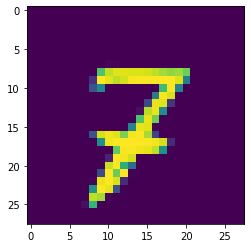

In [ ]:
from numpy.ma.core import argmax
img = plt.imread('7.png')[:,:,0]*1000
plt.imshow(img)
img=img.reshape(28*28,)
pred=model.predict(np.array([img]))
argmax(pred)

In [ ]:
pred_array=[]
acc = 0
for i in range(0,20):
  name = str(i)+'.png'
  img = plt.imread(name)[:,:,0]*1000
  img = img.reshape(28*28,)
  pred=model.predict(np.array([img]))
  num = argmax(pred)
  pred_array.append(num)
  if (i>9) & (num+10==i):
    acc+=1
  if (i<10) & (num==i):
    acc+=1
print(pred_array)
print('acc = ',acc/20)

1/1 [==============================] - 0s 19ms/step
[0, 7, 2, 2, 4, 5, 9, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
acc =  0.85
